# Deep Learning

## Multy layer percaptron - feed forward ANN

### Please Detect the mnist Number

### import libraries

In [45]:
import numpy as np

In [46]:
import pandas as pd

In [80]:
import tensorflow as tf

In [81]:
from keras.datasets import mnist

## Part 1: Get the data

In [82]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [84]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
import matplotlib.pyplot as plt

In [86]:
image_index = 53648

label: 8


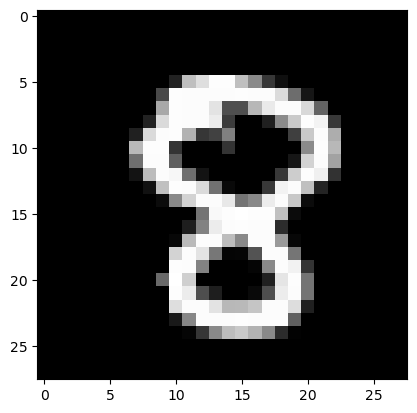

In [87]:
plt.imshow(x_train[image_index], cmap='gray')
print('label:', y_train[image_index])

label: 4


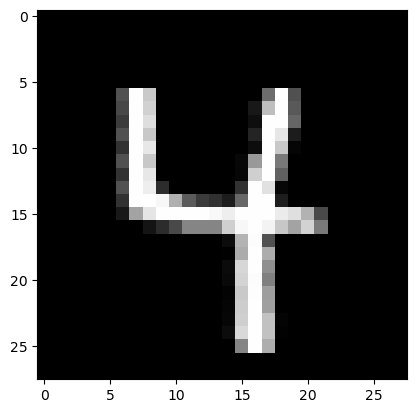

In [88]:
image_index = 45219
plt.imshow(x_train[image_index], cmap='gray')
print('label:', y_train[image_index])

label: 7


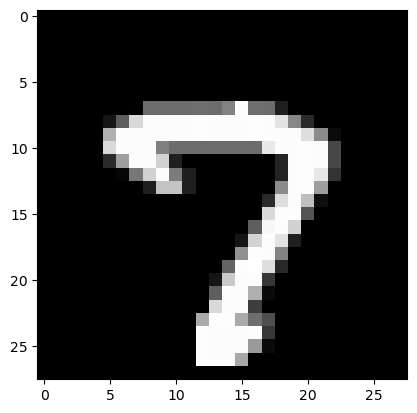

In [89]:
image_index = 52
plt.imshow(x_train[image_index], cmap='gray')
print('label:', y_train[image_index])

label: 5


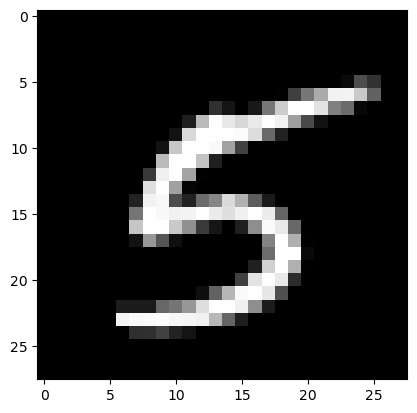

In [90]:
image_index = 52
plt.imshow(x_test[image_index], cmap='gray')
print('label:', y_test[image_index])

# Part 2: Pre-Processing

### Reshape

In [91]:
a = np.array([[1,2,3],[4,5,6],[7,8,9,],[10,11,12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [92]:
a.shape

(4, 3)

In [93]:
a.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [94]:
a.reshape(6, 2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

## Dimension Revision

In [95]:
x_train.shape

(60000, 28, 28)

In [96]:
x_train_final = x_train.reshape(-1, 28*28)/ 255
x_train_final.shape

(60000, 784)

In [97]:
x_test_final = x_test.reshape(-1, 28*28)/ 255
x_test_final.shape

(10000, 784)

#### To categorical (One-Hot Encoding)

In [98]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [99]:
# 0001000000 = 3
# 0000000001 = 9
# 1000000000 = 0
# 0000000100 = 7

In [100]:
from keras.utils import to_categorical

In [101]:
num_classes = 10

In [102]:
y_train_cat= to_categorical(y_train, num_classes)
y_test_cat= to_categorical(y_test, num_classes)

In [103]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [104]:
y_train_cat[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
y_train[5]

2

In [106]:
# x_train_final
# x_test_final
# y_train_cat
# y_test_cat

# Part 3: train the model (model selection):MLP-ANN

In [107]:
from keras.models import Sequential

In [108]:
model = Sequential()

In [109]:
from keras.layers import Dense,Input

In [111]:
model.add(Input(shape = (28*28,)))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

In [114]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                     │ (None, 20)               │        15,700 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 16)               │           336 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 16)               │           272 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_3 (Dense)                   │ (None, 10)               │           170 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 49,436 (193.11 KB)

 Trainable params: 16,478 (64.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,958 (128.75 KB)

In [119]:
model.fit(x_train_final, y_train_cat, epochs=30, batch_size=128, verbose=1, validation_data=(x_test_final, y_test_cat))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - Accuracy: 0.9641 - loss: 0.1201 - val_Accuracy: 0.9561 - val_loss: 0.1615
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - Accuracy: 0.9649 - loss: 0.1165 - val_Accuracy: 0.9595 - val_loss: 0.1449
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - Accuracy: 0.9663 - loss: 0.1121 - val_Accuracy: 0.9573 - val_loss: 0.1456
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - Accuracy: 0.9681 - loss: 0.1067 - val_Accuracy: 0.9574 - val_loss: 0.1493
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - Accuracy: 0.9686 - loss: 0.1052 - val_Accuracy: 0.9586 - val_loss: 0.1497
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - Accuracy: 0.9694 - loss: 0.1013 - val_Accuracy: 0.9602 - val_loss: 0.1426
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - Accuracy: 0.9702 - loss: 0.0982 - val_Accuracy: 0.9602 - val_loss: 0.1418
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - Accuracy: 0.9710 - loss: 0.0951 - v